In [14]:
#importing libraries
from sklearn.datasets import load_breast_cancer
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Table of Contents

* [Data Loading](#data_load)
* [Data Visualization](#data_viz)
    * [Individual Feature Exploration](#indiv_eda)
    * [Grouped Data Exploration](#group_eda)
    * [Correlation Matrix](#corr)
    * [Variance Inflation Factor](#vif)
* [Pre Processing](#prep)
* [Feature Importance](#feat)  
* [Scaling/Normalizing](#scale)

## Data loading <a class="anchor" id="data_load"></a>

Importing data set directly from scikit learn link: [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

[Original Data Source](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [72]:
#creating data frame of features
df = pd.DataFrame(load_breast_cancer().data)
df.columns = load_breast_cancer().feature_names

In [73]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
#adding target to data frame for exploration
df['target'] = load_breast_cancer().target
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [28]:
df.shape

(569, 31)

In [29]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

## Data visualization <a class="anchor" id="data_viz"></a>

### Individual Feature Exploration <a class="anchor" id="indiv_eda"></a>

In [35]:
data = df.drop(df.columns[-1], axis=1)

In [56]:
def plots(columns):
    fig, axs = plt.subplots(3, 3, figsize=(16, 12))
    fig.tight_layout()
    y = 0
    for col in columns:
        sns.distplot(data[col], ax = axs[0, y])
        sns.boxplot(y = col, data = data, palette='muted', ax = axs[1, y])
        sns.stripplot(x=df['target'], y=data[col], data=data,jitter=True, ax = axs[2, y])
        y = y+1

#### Inspecting Radius Measurements

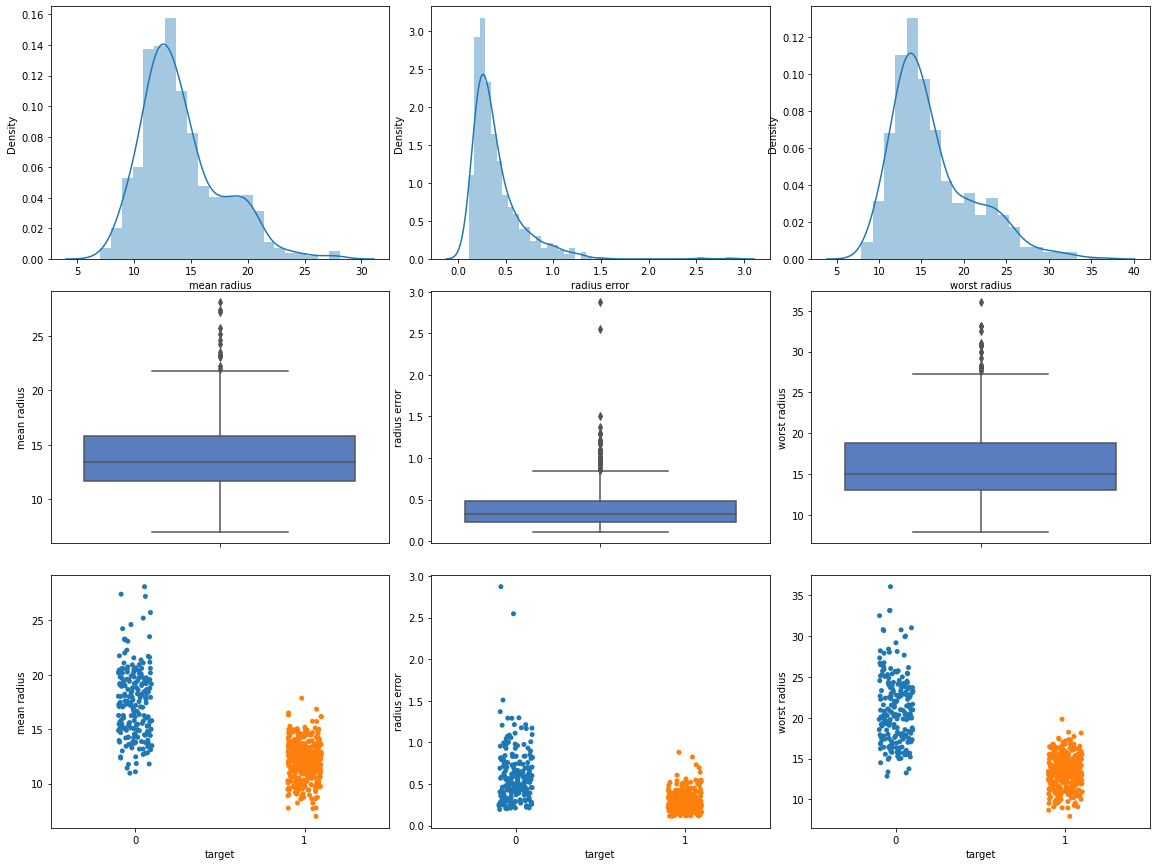

In [57]:
#Individual feature exploration: radius
plots(['mean radius', 'radius error', 'worst radius'])
 

#### Inspecting Texture Measurements

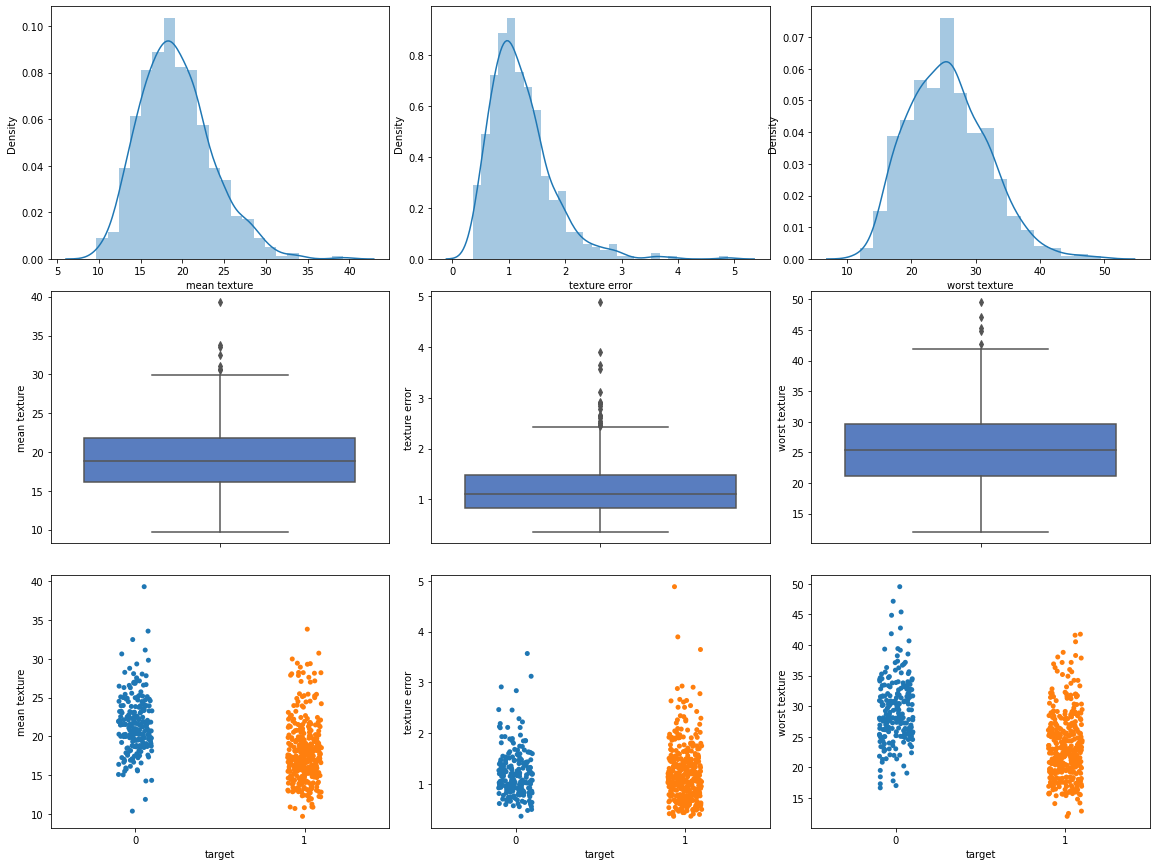

In [59]:
#Individual feature exploration: texture
plots(["mean texture", "texture error","worst texture"])

#### Inspecting Perimeter Measurements

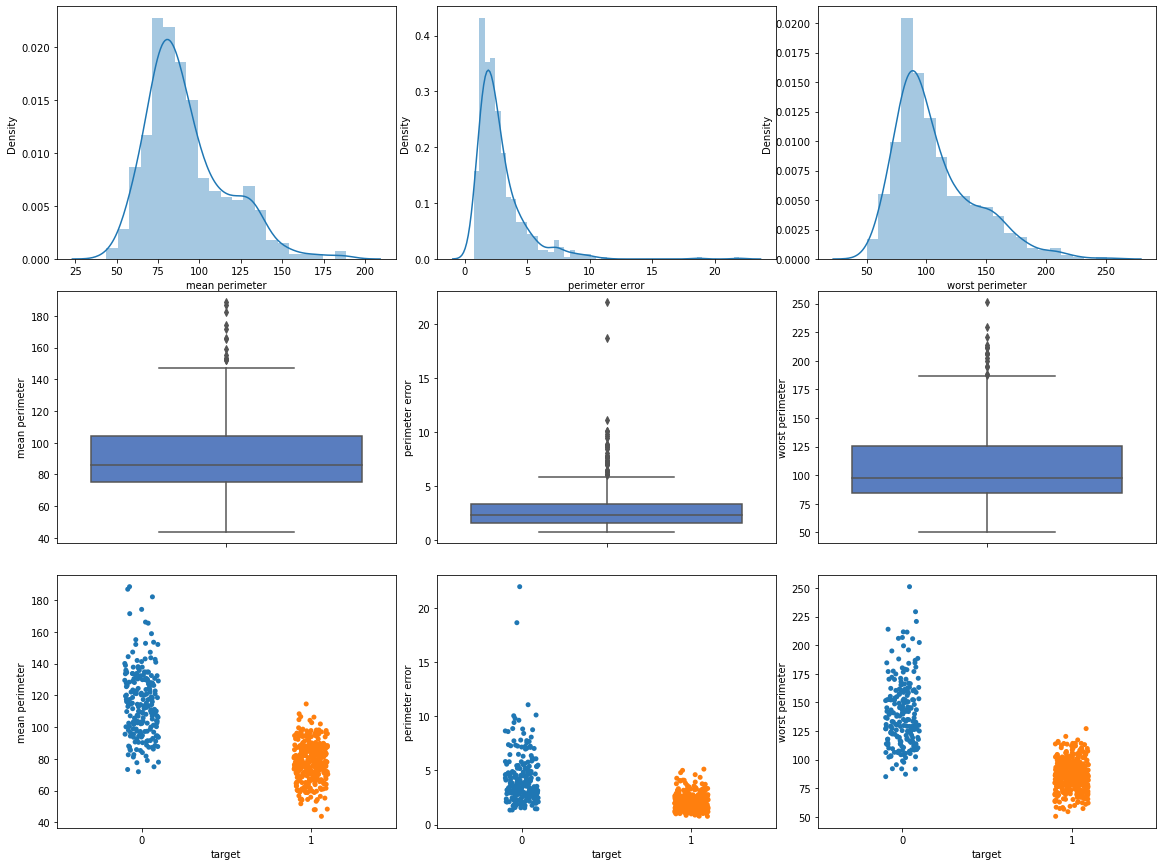

In [61]:
#Individual feature exploration: perimeter
plots(["mean perimeter", "perimeter error","worst perimeter"])

#### Inspecting Area Measurements

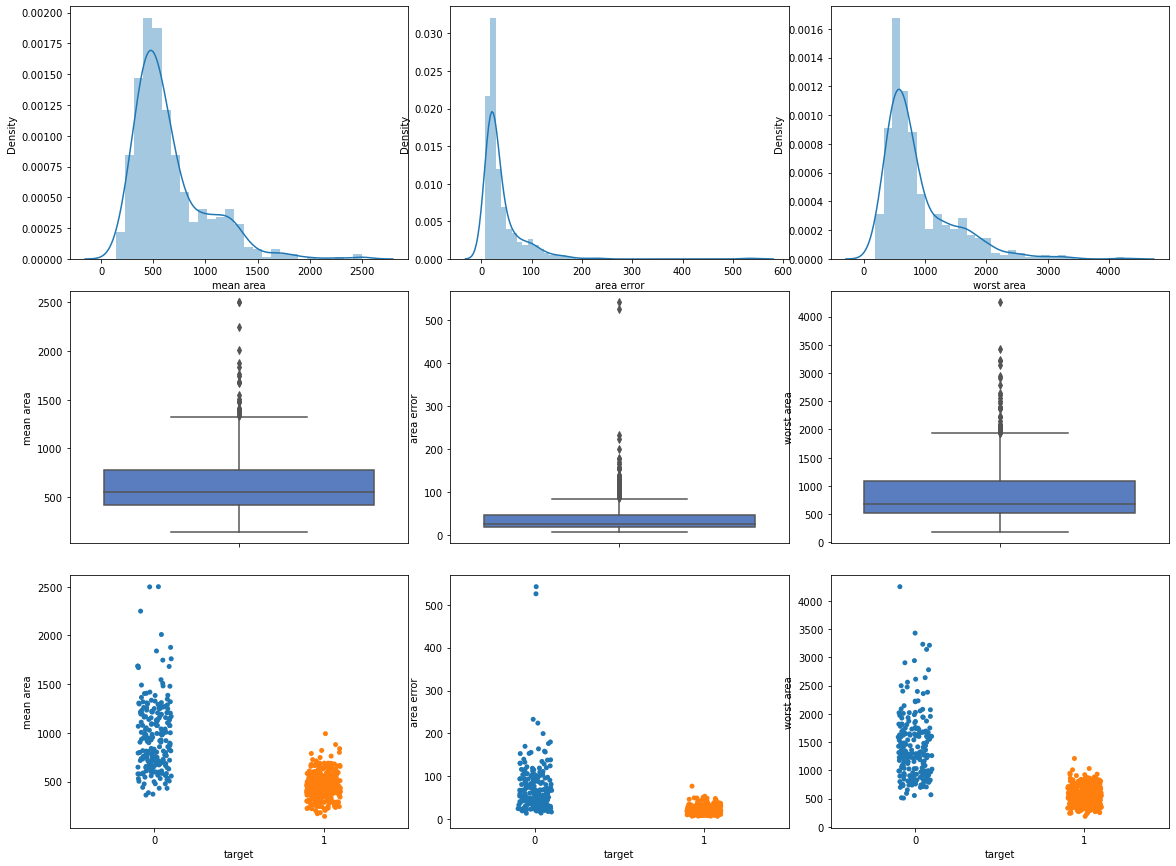

In [62]:
#Individual feature exploration:area
plots(["mean area", "area error","worst area"])

#### Inspecting Smoothness Measurements

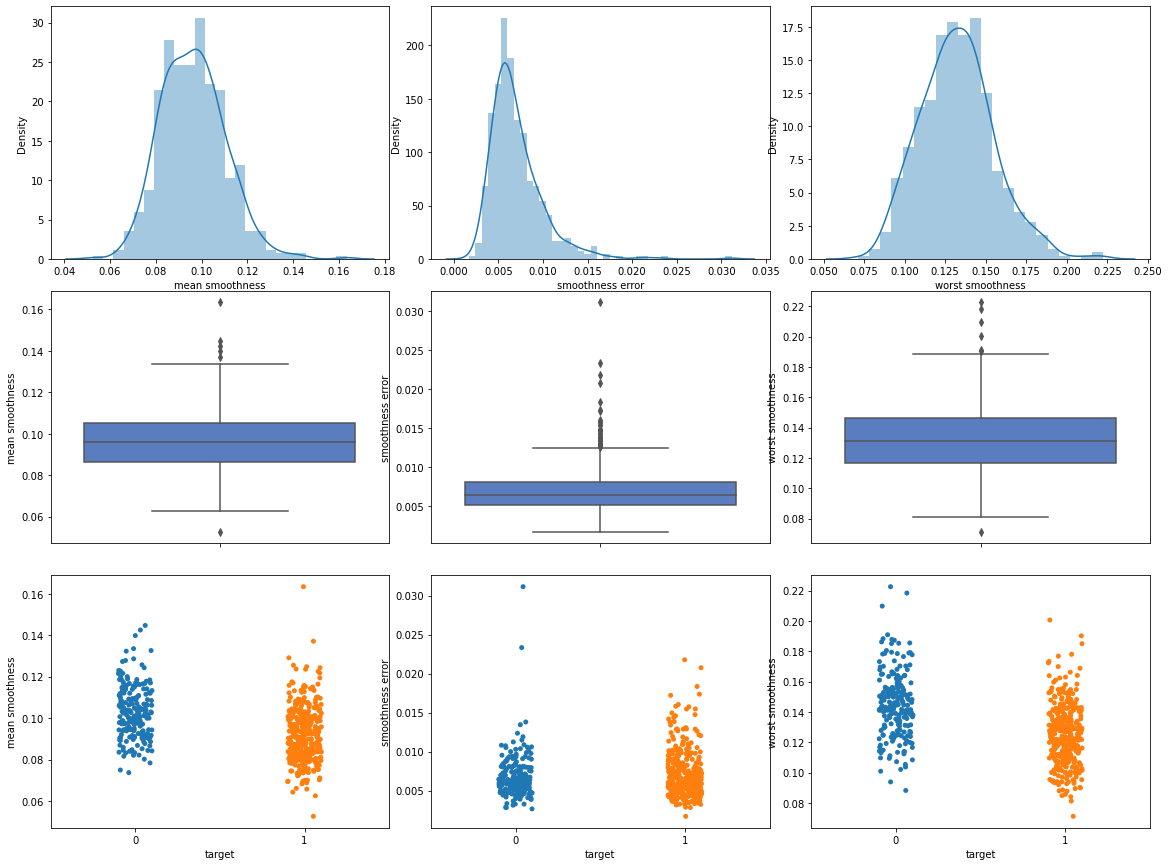

In [63]:
#Individual feature exploration:smoothness
plots(["mean smoothness", "smoothness error","worst smoothness"])

#### Inspecting Compactness Measurements

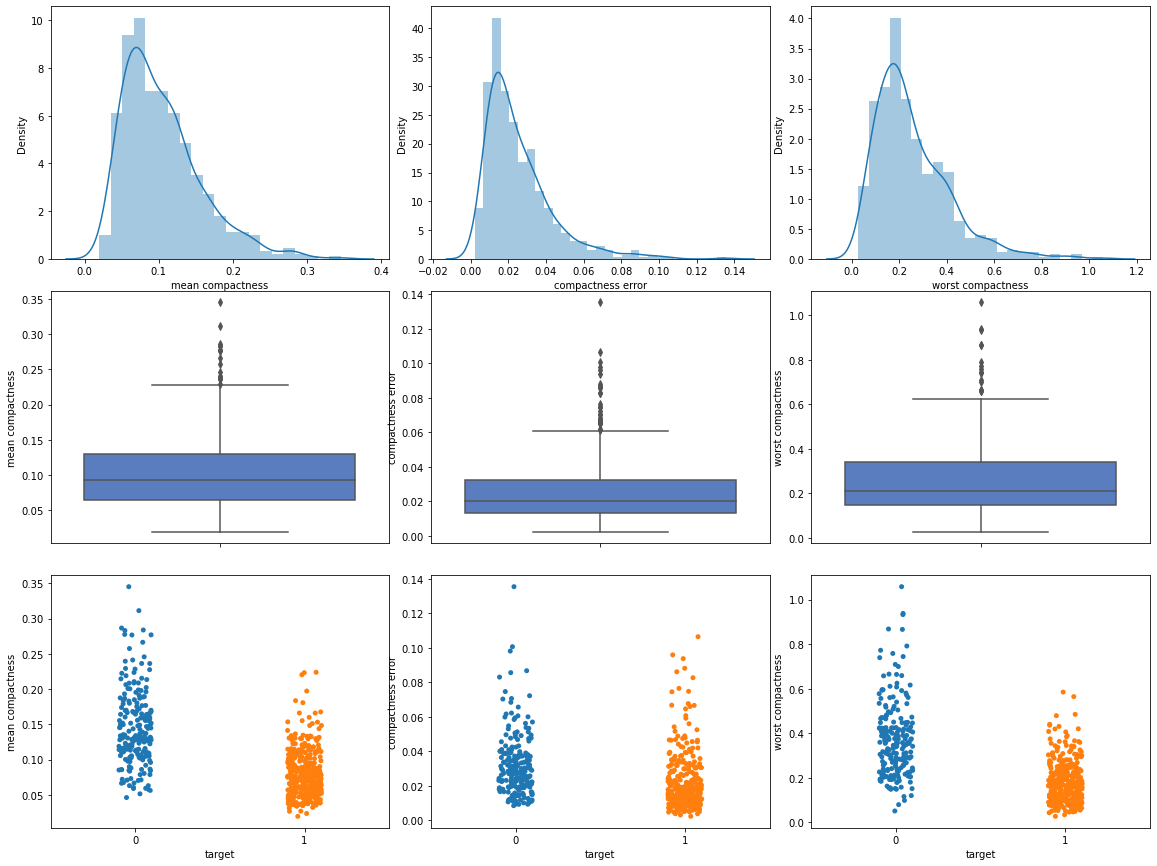

In [64]:
#Individual feature exploration:compactness
plots(["mean compactness", "compactness error","worst compactness"])

#### Inspecting Concavity Measurements

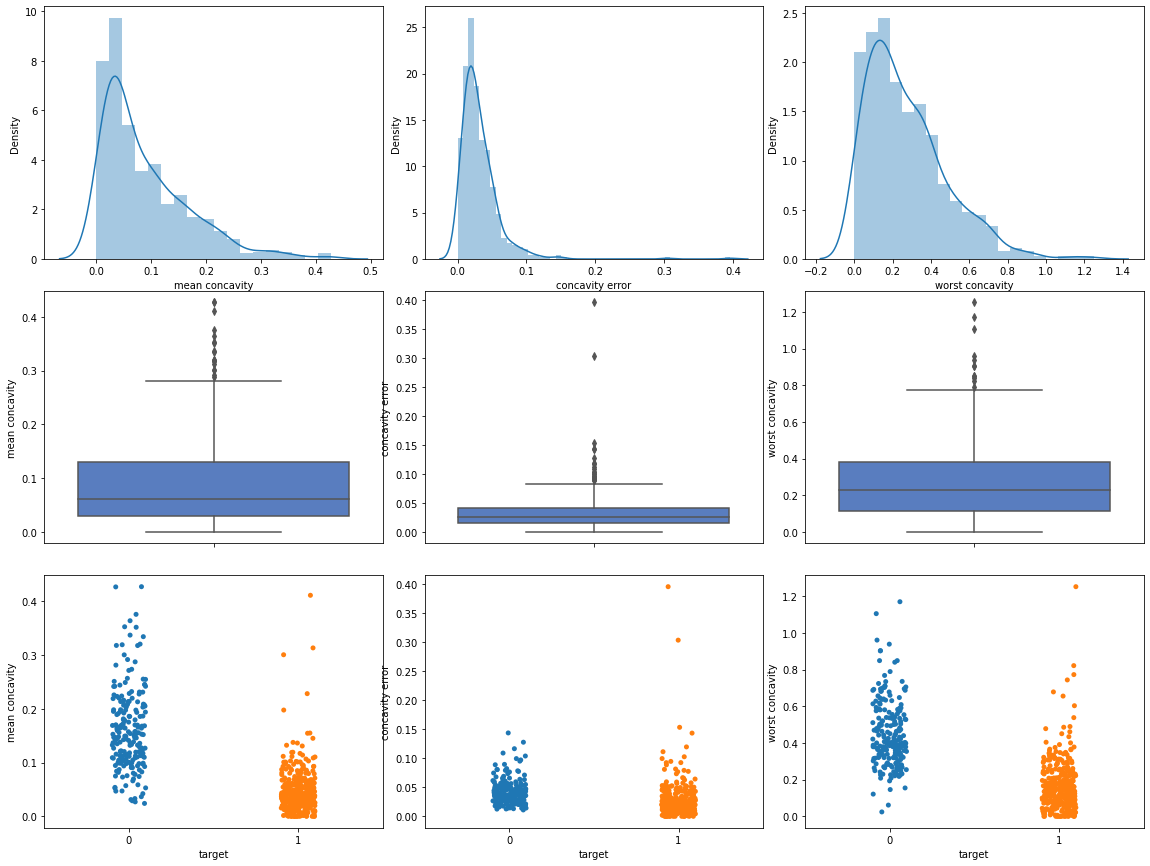

In [66]:
#Individual feature exploration:concavity
plots(["mean concavity", "concavity error","worst concavity"])

#### Inspecting Concave Points Measurements

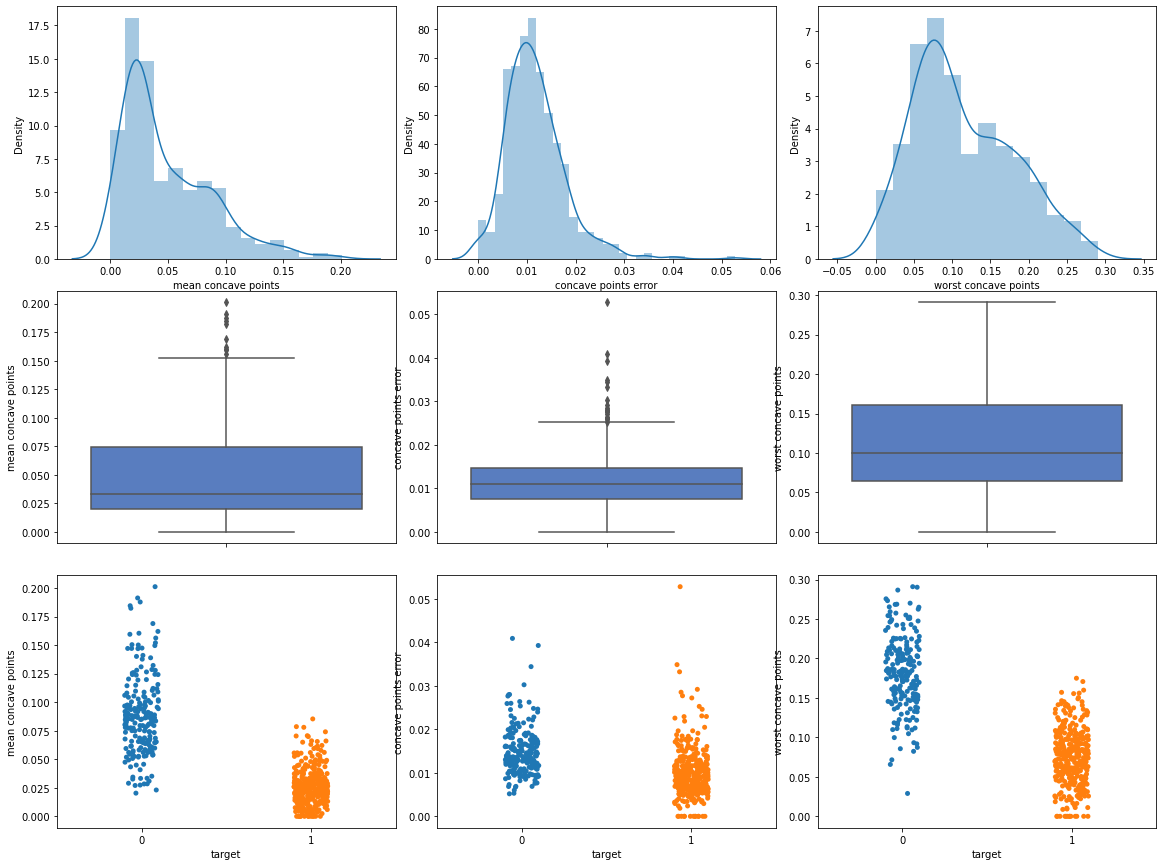

In [67]:
#Individual feature exploration:concave points
plots(["mean concave points", "concave points error","worst concave points"])

#### Inspecting Symmetry Measurements

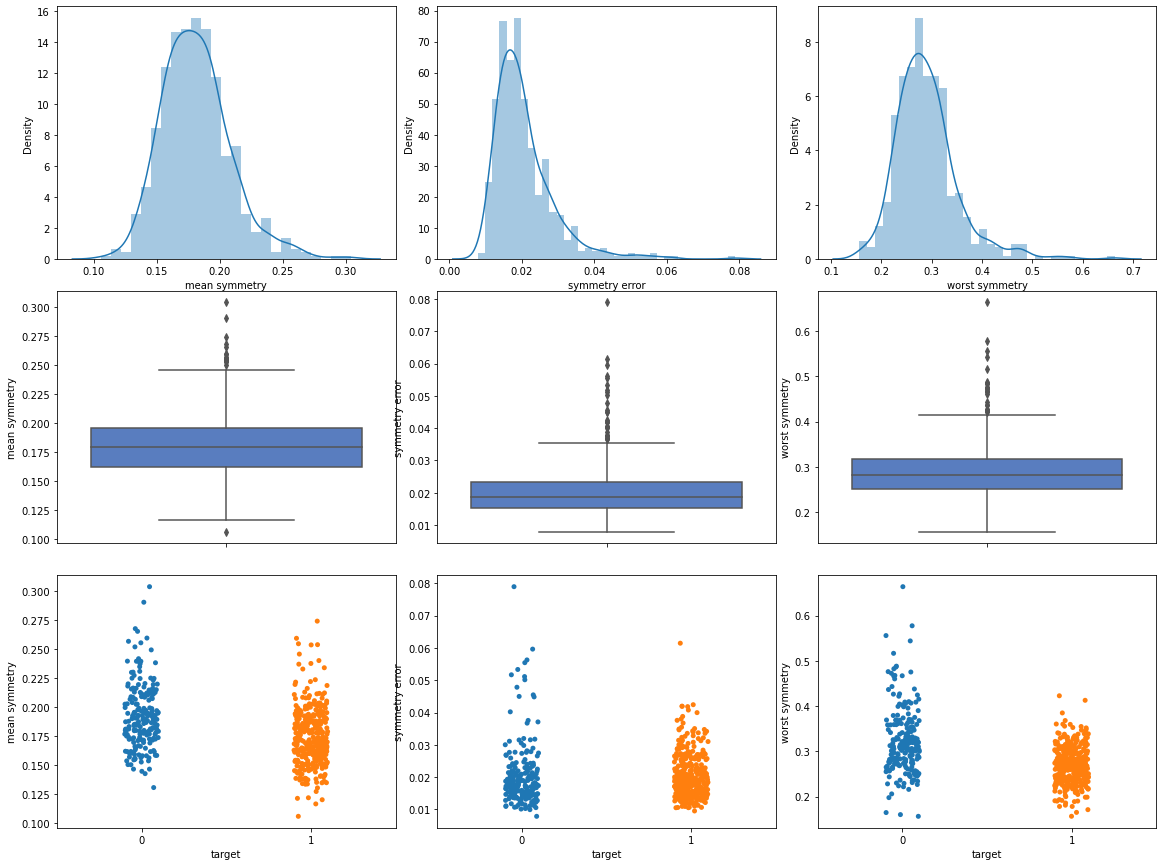

In [68]:
#Individual feature exploration:symmetry
plots(["mean symmetry", "symmetry error","worst symmetry"])

#### Inspecting Fractal Dimension Measurements

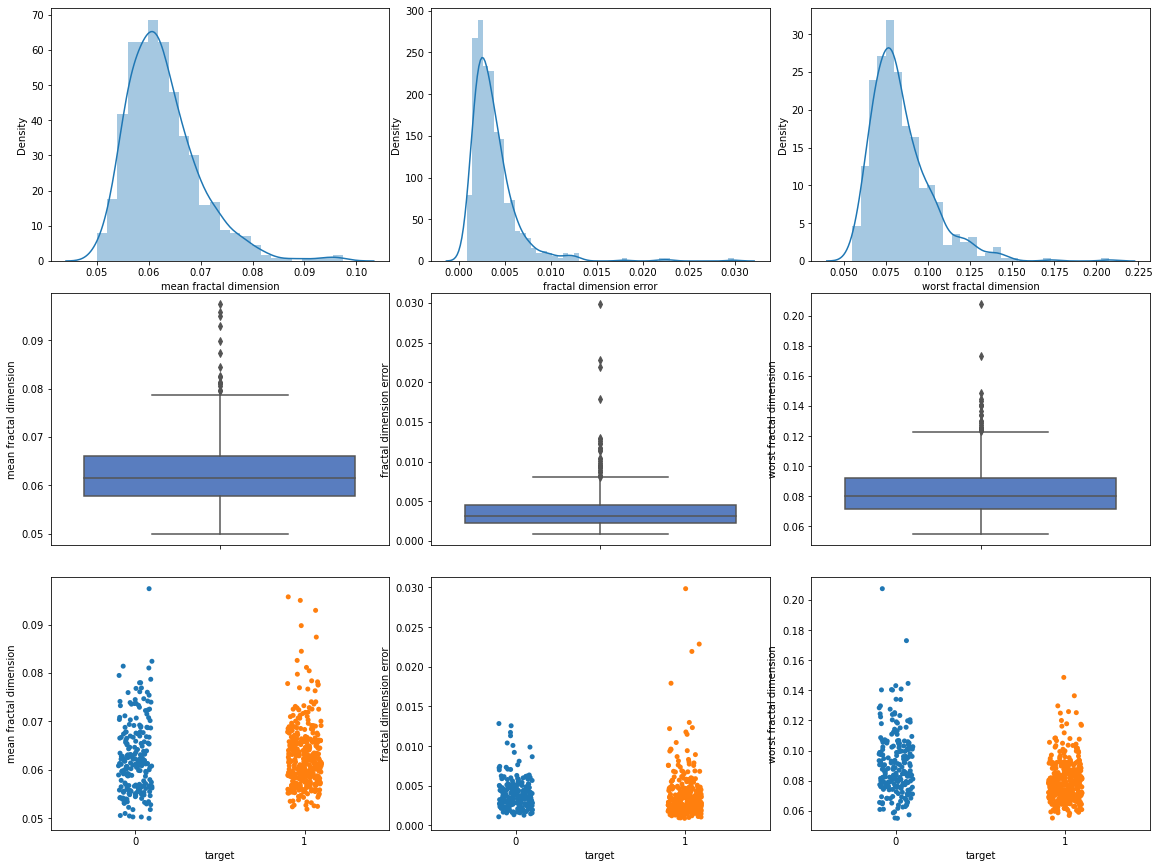

In [69]:
#Individual feature exploration:fractal dimension
plots(["mean fractal dimension", "fractal dimension error","worst fractal dimension"])

Benign: 62.741652021089635%
Malignant: 37.258347978910365%



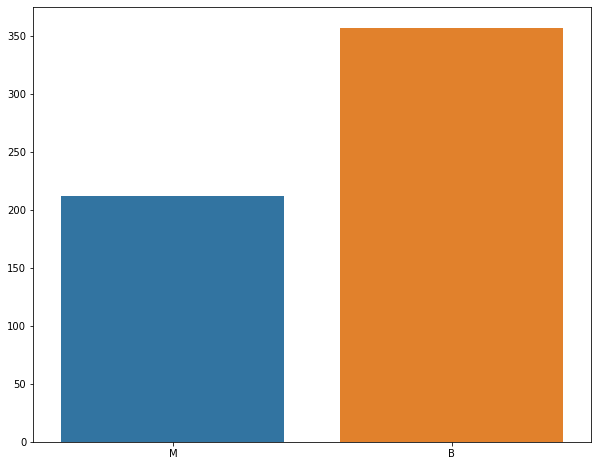

In [76]:
counts = df["target"].value_counts()
#providing context, 1 is cancer (malignant), 0 is not cancer (benign)
diag_cols = ["M","B"]
diag_counts = [counts[0], counts[1]]

benign = (diag_counts[1] / sum(diag_counts)) * 100
malignant = (diag_counts[0] / sum(diag_counts))*100

print(f"Benign: {benign}%")
print(f"Malignant: {malignant}%")

print()

plt.figure(figsize = (10, 8))
sns.barplot(x = diag_cols, y = diag_counts)
plt.show()

### Grouped Data Exploration <a class="anchor" id="group_eda"></a>

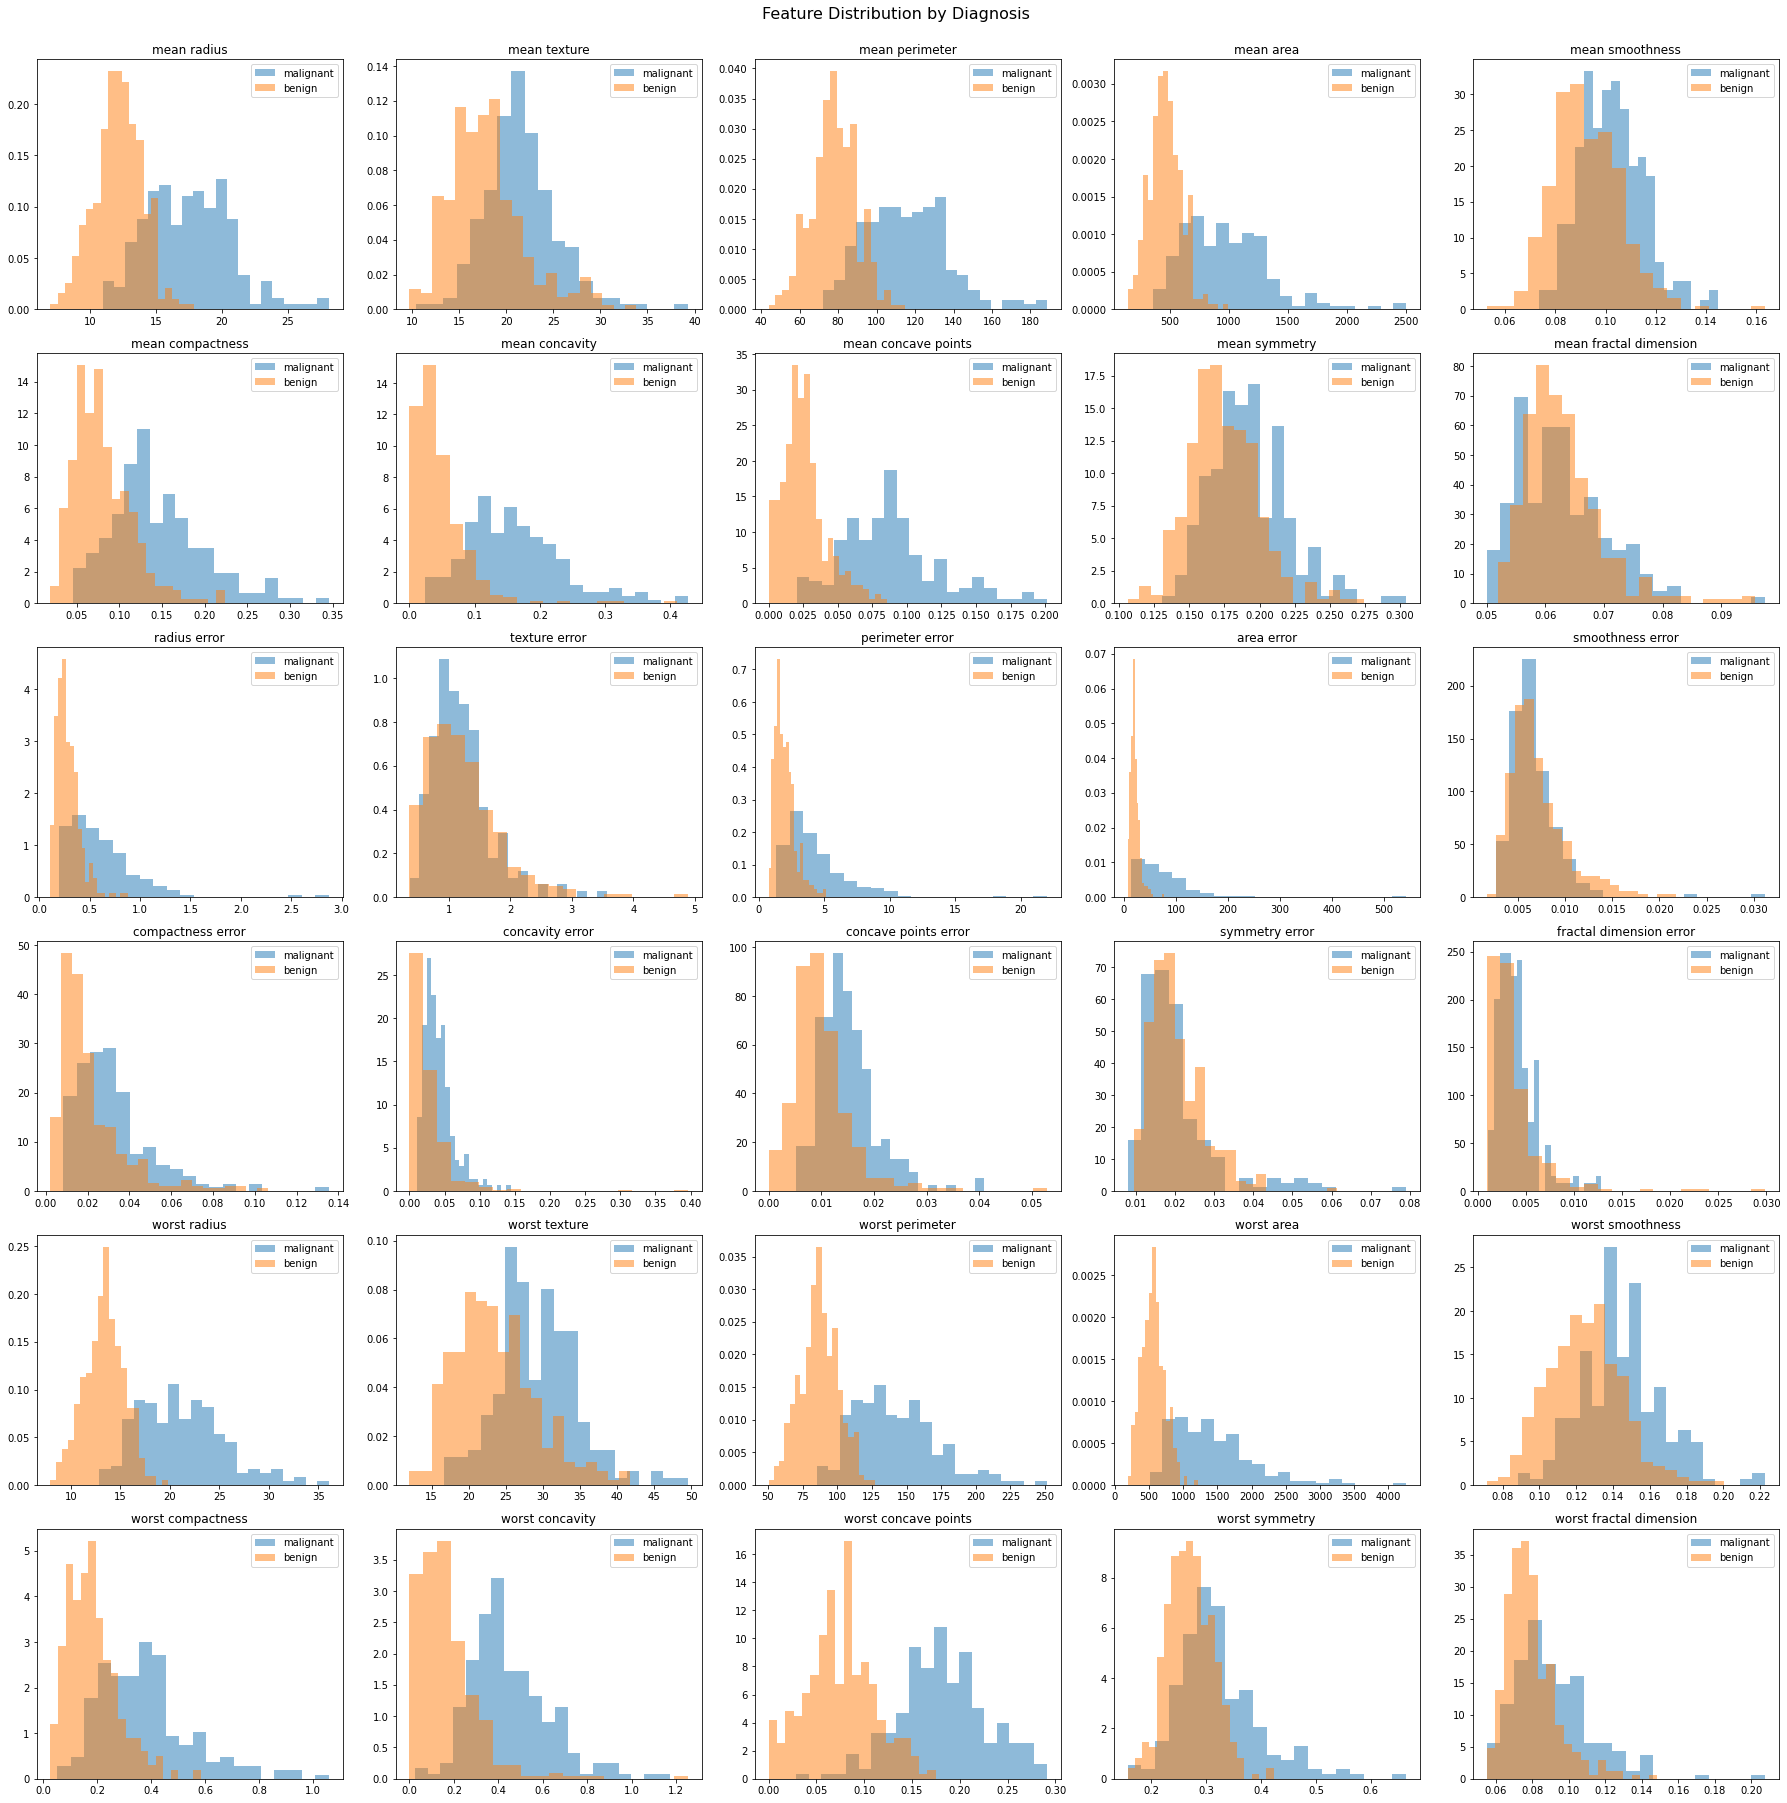

In [77]:
#plotting feature distribution according to target variable
plt.figure(figsize=(25,25))
plt.subplots_adjust(top=1.5)
plt.suptitle("Feature Distribution by Diagnosis", fontsize=16, y=1)
for col,index in zip(df.columns,range(1,31)):
    if col == 'target':
        pass
    else:
        plt.subplot(6,5,index)
        plt.hist(df.loc[df["target"]==0][col],alpha=0.5,label="malignant",density=True,bins=20)
        plt.hist(df.loc[df["target"]==1][col],alpha=0.5,label="benign",density=True,bins=20)
        plt.legend()
        plt.title(col)
plt.tight_layout()
plt.show()

## Correlation Matrix <a class="anchor" id="corr"></a>

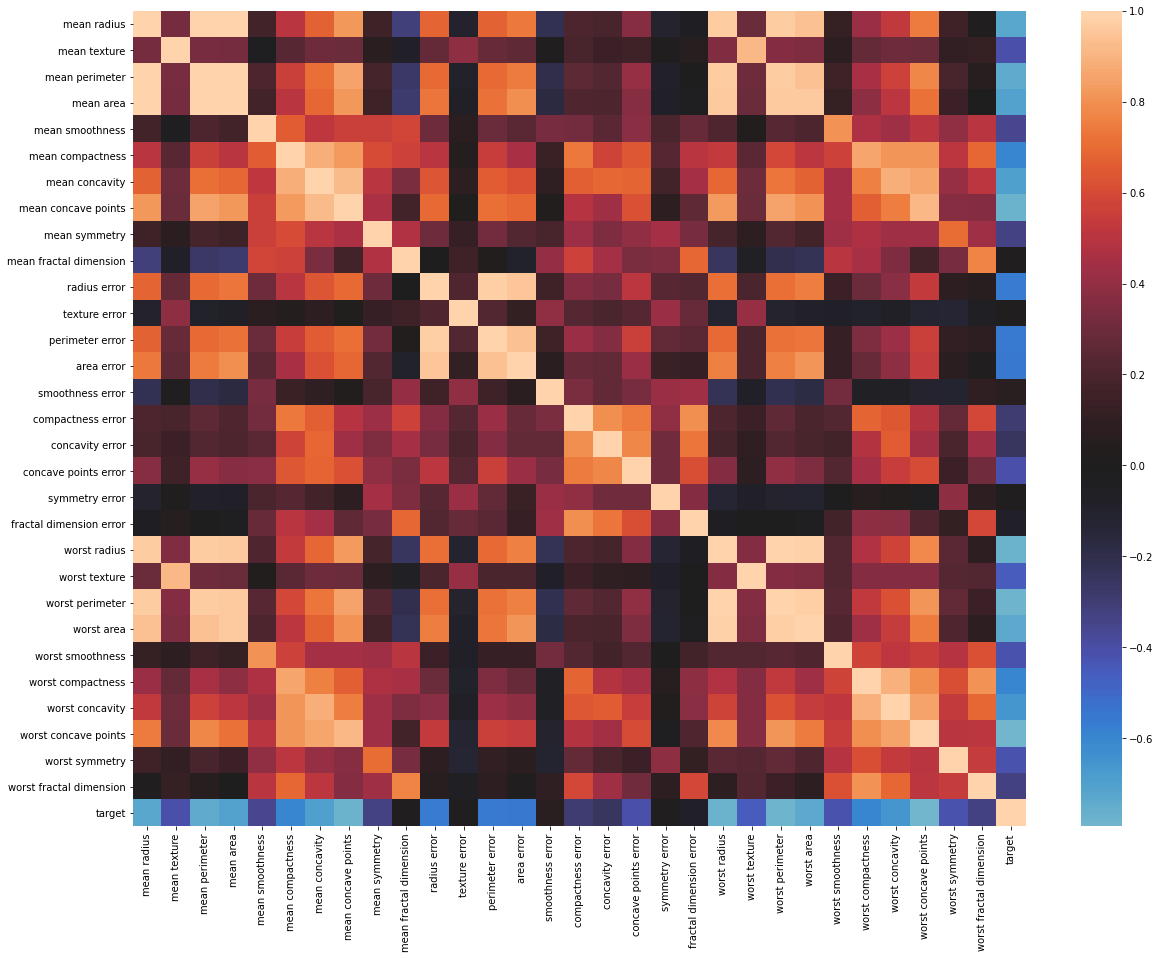

In [79]:
plt.figure(figsize = (20,15))
sns.heatmap(df[df.columns].corr(), center = 0)
plt.show()

### Variance Inflation Factor <a class="anchor" id="vif"></a>

In [82]:
# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = df.loc[:, df.columns != 'target']

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

                  variables           VIF
0               mean radius  63306.172036
1              mean texture    251.047108
2            mean perimeter  58123.586079
3                 mean area   1287.262339
4           mean smoothness    393.398166
5          mean compactness    200.980354
6            mean concavity    157.855046
7       mean concave points    154.241268
8             mean symmetry    184.426558
9    mean fractal dimension    629.679874
10             radius error    236.665738
11            texture error     24.675367
12          perimeter error    211.396334
13               area error     72.466468
14         smoothness error     26.170243
15        compactness error     44.919651
16          concavity error     33.244099
17     concave points error     53.698656
18           symmetry error     37.176452
19  fractal dimension error     27.532631
20             worst radius   9674.742602
21            worst texture    343.004387
22          worst perimeter   4487

In [83]:
vif.sort_values(by='VIF', ascending=False)

,variables,VIF
0,mean radius,63306.172036
2,mean perimeter,58123.586079
20,worst radius,9674.742602
22,worst perimeter,4487.781270
3,mean area,1287.262339
23,worst area,1138.759252
9,mean fractal dimension,629.679874
29,worst fractal dimension,423.396723
4,mean smoothness,393.398166
24,worst smoothness,375.597155
